In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_police = pd.read_csv('Deaths_by_Police_US.csv', encoding='ISO-8859-1')
df_hh = pd.read_csv('Median_Household_Income_2015.csv', encoding='ISO-8859-1')
df_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding='ISO-8859-1')
df_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding='ISO-8859-1')
df_racebycity = pd.read_csv('Share_of_Race_By_City.csv', encoding='ISO-8859-1')

# Data Exploration

In [2]:
df_police = pd.read_csv('police_clear.csv')

## Death by Police US

In [3]:
df_police.head(5)

,Unnamed: 0,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,0,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1
1,1,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,2,1
2,2,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015,3,1
3,3,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,4,1
4,4,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015,4,1


In [4]:
df_police = df_police.drop(columns='Unnamed: 0')

In [5]:
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     2535 non-null   object
 1   date                     2535 non-null   object
 2   manner_of_death          2535 non-null   object
 3   armed                    2526 non-null   object
 4   age                      2535 non-null   int64 
 5   gender                   2535 non-null   object
 6   race                     2535 non-null   object
 7   city                     2535 non-null   object
 8   state                    2535 non-null   object
 9   signs_of_mental_illness  2535 non-null   bool  
 10  threat_level             2535 non-null   object
 11  flee                     2470 non-null   object
 12  body_camera              2535 non-null   bool  
 13  year                     2535 non-null   int64 
 14  month                    2535 non-null  

Note: Date, Age, id.sort_value

In [19]:
df_police.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [72]:
df_police.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                          0
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [34]:
police_nan = df_police[df_police.isna().any(axis=1)]
police_nan.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False


In [73]:
police_nan['age']

59      59.0
124      NaN
241     54.0
266     54.0
340     72.0
        ... 
2528     NaN
2529    32.0
2530    31.0
2531     NaN
2532    48.0
Name: age, Length: 281, dtype: float64

In [31]:
df_police.duplicated().sum()

0

## Household Income

In [32]:
df_hh.head(5)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [33]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


Note: Median Income

In [35]:
df_hh.describe()

,Geographic Area,City,Median Income
count,29322,29322,29271
unique,51,24249,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [37]:
df_hh.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [40]:
hh_nan = df_hh[df_hh.isna().any(axis=1)]
hh_nan.head()

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN


In [42]:
df_hh.duplicated().sum()

0

## Highschool

In [43]:
df_hs.head(5)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [44]:
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


Note: Percent_Completed_Hs

In [46]:
df_hs.describe()

,Geographic Area,City,percent_completed_hs
count,29329,29329,29329
unique,51,24255,728
top,PA,Franklin city,100
freq,1762,16,1301


In [47]:
df_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [50]:
hs_nan = df_hs[df_hs.isna().any(axis=1)]
hs_nan.head(5)

,Geographic Area,City,percent_completed_hs


In [51]:
df_hs.duplicated().sum()

0

## Poverty

In [52]:
df_poverty.head(5)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [54]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


Note: Poverty_rate

In [55]:
df_poverty.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [56]:
df_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [57]:
poverty_nan = df_poverty[df_poverty.isna().any(axis=1)]
poverty_nan

,Geographic Area,City,poverty_rate


In [58]:
df_poverty.duplicated().sum()

0

## Race by City

In [59]:
df_racebycity.head(5)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [60]:
df_racebycity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


Note: share_white, share_black, share_native_american, share_asian, share_hispanic

In [61]:
df_racebycity.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [62]:
df_racebycity.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [63]:
race_nan = df_racebycity[df_racebycity.isna().any(axis=1)]
race_nan

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


In [64]:
df_racebycity.duplicated().sum()

0

# Data Manipulation

## Death by Police US

In [102]:
#Memisahkan data berdasarkan tahun, bulan, dan hari
#df_police['year'] = df_police['date'].dt.year
#df_police['month'] = df_police['date'].dt.month
#df_police['day'] = df_police['date'].dt.day
#df_police = df_police.drop(columns=['day','year','month'])
#df_police = df_police.rename(columns={'date':'day'})
#df_police['date'] = np.add(df_police['day'], df_police['month'], df_police['year'])
#df_police.drop(columns=['day','year','month','date'])

In [167]:
#Mengisi age column
df_police['race'].fillna('Unknown', inplace=True)

In [168]:
#Mengisi race column
df_police['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'Unknown', 'N'], dtype=object)

In [169]:
df_police.sort_values(by='id', inplace=True)

In [132]:
df_police.drop(columns='id')

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,date
0,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015-02-01
1,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015-02-01
2,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015-03-01
3,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015-04-01
4,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,Isaiah Tucker,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,2017-07-31
2532,Dennis W. Robinson,shot,gun,48.0,M,Unknown,Melba,ID,False,attack,Car,False,2017-07-29
2529,Brian J. Skinner,shot,knife,32.0,M,Unknown,Glenville,NY,True,other,Not fleeing,False,2017-07-28
2525,Deltra Henderson,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,2017-07-27


In [175]:
#Merubah datatype object menjadi datetime
df_police['date'] = pd.to_datetime(df_police['date'])

C:\Users\chesa\AppData\Local\Temp\ipykernel_17676\3222717658.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_police['date'] = pd.to_datetime(df_police['date'])


In [176]:
df_police.tail(1)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,Rodney E. Jacobs,2017-07-28,shot,gun,31.0,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False


In [171]:
df_police.drop(columns='id', inplace=True)

In [177]:
df_police['year'] = df_police['date'].dt.year
df_police['month'] = df_police['date'].dt.month
df_police['day'] = df_police['date'].dt.day

In [180]:
df_police.head(2)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1
1,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,2,1


In [158]:
df_police['month'].unique()

array(['2', '3', '4', '5', '6', '1', '7', '8', '9', '11', '10', '12'],
      dtype=object)

In [149]:
df_police['month'] = df_police['month'].astype(str)

In [157]:
df_police['month'] = df_police.replace(columns={'1':'January','2':'February', '3':'March', '4':'April','5':'May','6':'Juny','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'})

ValueError: Columns must be same length as key

In [186]:
df_police.age.fillna(df_police.age.mean(), inplace=True)

In [193]:
df_police.age = df_police.age.astype(int)

In [299]:
df_police.to_csv('police_clear.csv')

## Households

In [195]:
df_hh.head(5)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [219]:
df_hh['Median Income'] = pd.to_numeric(df_hh['Median Income'], errors='coerce')

In [234]:
df_hh['Median Income'] = df_hh['Median Income'].astype(int)

In [229]:
df_hh['Median Income'] = df_hh['Median Income'].replace({0.0:df_hh['Median Income'].mean()})

In [235]:
df_hh.tail(5)

,Geographic Area,City,Median Income
29317,WY,Woods Landing-Jelm CDP,51082
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,51082


## Highschool

In [267]:
df_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding='ISO-8859-1')
df_hs.head(5)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [268]:
df_hs['percent_completed_hs'] = pd.to_numeric(df_hs['percent_completed_hs'], errors='coerce')

In [269]:
df_hs['percent_completed_hs'] = df_hs['percent_completed_hs'].fillna(df_hs['percent_completed_hs'].mean())

In [270]:
df_hs['percent_completed_hs'].astype(int)

0         21
1         69
2         78
3         81
4         68
        ... 
29324    100
29325     85
29326     89
29327     79
29328    100
Name: percent_completed_hs, Length: 29329, dtype: int32

## Poverty

In [262]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 573.0+ KB


In [249]:
df_poverty['poverty_rate'] = pd.to_numeric(df_poverty['poverty_rate'], errors='coerce')

In [260]:
df_poverty.isna().any(axis=1).sum()

0

In [259]:
df_poverty['poverty_rate'] = df_poverty['poverty_rate'].fillna(df_poverty['poverty_rate'].mean())

In [261]:
df_poverty['poverty_rate'] = df_poverty['poverty_rate'].astype(int)

In [263]:
df_poverty.head(2)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78
1,AL,Abbeville city,29


## Join table

In [271]:
df_city = pd.concat([df_poverty,df_hh,df_hs], axis=1)
df_city.head(5)

,Geographic Area,City,poverty_rate,Geographic Area,City,Median Income,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,78,AL,Abanda CDP,11207.0,AL,Abanda CDP,21.2
1,AL,Abbeville city,29,AL,Abbeville city,25615.0,AL,Abbeville city,69.1
2,AL,Adamsville city,25,AL,Adamsville city,42575.0,AL,Adamsville city,78.9
3,AL,Addison town,30,AL,Addison town,37083.0,AL,Addison town,81.4
4,AL,Akron town,42,AL,Akron town,21667.0,AL,Akron town,68.6


In [287]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   poverty_rate          29329 non-null  int32  
 3   Median Income         29329 non-null  int32  
 4   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), int32(2), object(2)
memory usage: 916.7+ KB


In [272]:
df_city = df_city.loc[:, ~df_city.columns.duplicated()]

In [279]:
df_city['Median Income'] = df_city['Median Income'].fillna(df_city['Median Income'].mean())

C:\Users\chesa\AppData\Local\Temp\ipykernel_17676\3796488787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['Median Income'] = df_city['Median Income'].fillna(df_city['Median Income'].mean())


In [284]:
df_city['Median Income'] = df_city['Median Income'].astype(int)

C:\Users\chesa\AppData\Local\Temp\ipykernel_17676\1129069530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['Median Income'] = df_city['Median Income'].astype(int)


In [289]:
df_city.tail(2)

,Geographic Area,City,poverty_rate,Median Income,percent_completed_hs
29327,WY,Yoder town,5,51171,79.4
29328,WY,Y-O Ranch CDP,0,51171,100.0


In [290]:
df_city.to_csv('df_city_clear.csv')

In [292]:
df_police.head(1)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1


# Data Modelling

In [6]:
df_city = pd.read_csv('df_city_clear.csv')
df_city.head(5)

,Unnamed: 0,Geographic Area,City,poverty_rate,Median Income,percent_completed_hs
0,0,AL,Abanda CDP,78,11207,21.2
1,1,AL,Abbeville city,29,25615,69.1
2,2,AL,Adamsville city,25,42575,78.9
3,3,AL,Addison town,30,37083,81.4
4,4,AL,Akron town,42,21667,68.6


In [7]:
df_city = df_city.drop(columns='Unnamed: 0')

In [8]:
df_city.head(2)

,Geographic Area,City,poverty_rate,Median Income,percent_completed_hs
0,AL,Abanda CDP,78,11207,21.2
1,AL,Abbeville city,29,25615,69.1


In [296]:
df_corr = df_city[['poverty_rate','Median Income', 'percent_completed_hs']].corr()
df_corr

,poverty_rate,Median Income,percent_completed_hs
poverty_rate,1.000000,-0.159742,-0.500056
Median Income,-0.159742,1.000000,0.135282
percent_completed_hs,-0.500056,0.135282,1.000000


## Onehot Encoder

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [17]:
df_police.head(2)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1
1,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,2,1


In [12]:
x_df = pd.get_dummies(df_police, columns=['gender'], prefix='Gender')
x_df.head(3)

,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day,Gender_F,Gender_M
0,Tim Elliot,2015-02-01,shot,gun,53,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1,False,True
1,Lewis Lee Lembke,2015-02-01,shot,gun,47,W,Aloha,OR,False,attack,Not fleeing,False,2015,2,1,False,True
2,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,H,Wichita,KS,False,other,Not fleeing,False,2015,3,1,False,True


In [17]:
x_ohe = ohe.fit_transform(x_df[['Gender_F']], x_df[['Gender_M']])
x_ohe

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
df_x = pd.DataFrame(x_ohe)
#df_x = df_x.drop(columns=[2,3])
df_x

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2530,1.0,0.0
2531,1.0,0.0
2532,1.0,0.0
2533,1.0,0.0


# Data Visualization

C:\Users\chesa\AppData\Local\Temp\ipykernel_17676\3078488398.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df_city['poverty_rate'],y=df_city['percent_completed_hs'], cmap='Blues')


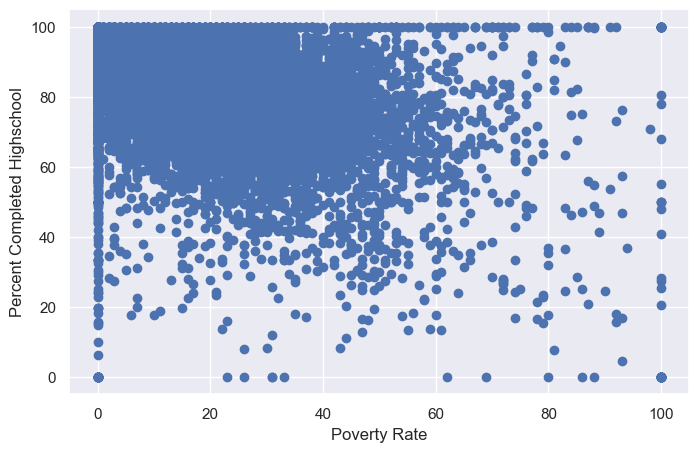

In [300]:
plt.figure(figsize=(8,5))
plt.scatter(x=df_city['poverty_rate'],y=df_city['percent_completed_hs'], cmap='Blues')
plt.xlabel('Poverty Rate')
plt.ylabel('Percent Completed Highschool')
plt.show()

# Feature Importance

## Correlation between Median Income, Poverty Rate, and Percentage of Completed HS

In [13]:
df_city_correlation = df_city[['Median Income','poverty_rate', 'percent_completed_hs']].corr()

In [14]:
df_city['percent_completed_hs'] = df_city['percent_completed_hs'].astype('int64')

In [15]:
df_police_correlation

NameError: name 'df_police_correlation' is not defined

In [41]:
df_city.head(5)

,Geographic Area,City,poverty_rate,Median Income,percent_completed_hs
0,AL,Abanda CDP,78,11207,21
1,AL,Abbeville city,29,25615,69
2,AL,Adamsville city,25,42575,78
3,AL,Addison town,30,37083,81
4,AL,Akron town,42,21667,68


In [42]:
x = df_city.iloc[:,2]
y = df_city.iloc[:,4]
x, y 

(0        78
 1        29
 2        25
 3        30
 4        42
          ..
 29324    18
 29325    15
 29326     5
 29327     5
 29328     0
 Name: poverty_rate, Length: 29329, dtype: int64,
 0         21
 1         69
 2         78
 3         81
 4         68
         ... 
 29324    100
 29325     85
 29326     89
 29327     79
 29328    100
 Name: percent_completed_hs, Length: 29329, dtype: int64)

In [44]:
df_police.head(5)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1
1,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,2,1
2,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015,3,1
3,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,4,1
4,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015,4,1


In [36]:
df_police['body_camera'].unique()

array([False,  True])

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[78. 29. 25. ...  5.  5.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Look for donnut chart people killed by Race

In [45]:
df_police.head(5)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2,1
1,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,2,1
2,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015,3,1
3,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,4,1
4,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015,4,1


## One hot Encoding to convert kategorik type to numerik type

In [48]:
df_police.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'Unknown', 'N'], dtype=object)

In [69]:
RaceKilled = ohe.fit_transform(df_police[['race']])
RaceKilled

C:\Users\chesa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [71]:
df_RaceKilled = pd.DataFrame(RaceKilled)
df_RaceKilled

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2530,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2531,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2532,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2533,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df_RaceKilled = df_RaceKilled.rename(columns={0:'Asian', 1:'Black', 2:'Hispanic', 3:'Native',4:'Others',5:'Unknown',6:'White'})

In [74]:
df_RaceKilled

,Asian,Black,Hispanic,Native,Others,Unknown,White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2530,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2531,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2532,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2533,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Stadarization

In [81]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [83]:
df_scaler = standard.fit_transform(df_RaceKilled)
df_scaler

array([[ 8.        , -0.56778404, -0.44753111, ..., -0.1056822 ,
        -0.28867513, -0.94884132],
       [-0.125     , -0.56778404, -0.44753111, ..., -0.1056822 ,
        -0.28867513,  1.053917  ],
       [-0.125     , -0.56778404,  2.23448155, ..., -0.1056822 ,
        -0.28867513, -0.94884132],
       ...,
       [-0.125     , -0.56778404, -0.44753111, ..., -0.1056822 ,
         3.46410162, -0.94884132],
       [-0.125     ,  1.76123302, -0.44753111, ..., -0.1056822 ,
        -0.28867513, -0.94884132],
       [-0.125     , -0.56778404, -0.44753111, ..., -0.1056822 ,
         3.46410162, -0.94884132]])

## Visualization donut charts

In [25]:
race_dad = df_police.race.value_counts()
race_dad = pd.DataFrame(race_dad)
race_dad

,count
race,
W,1201
B,618
H,423
Unknown,195
A,39
N,31
O,28


TypeError: 'method' object is not iterable

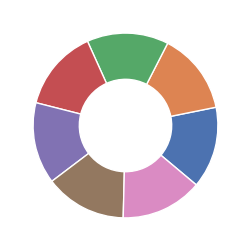

In [27]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(race_dad.value_counts(), wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

ax.legend(wedges, race_dad.count,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()